In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

In [2]:
#fungsi keanggotaan Input.
Layanan = np.arange(0,11,1)
Makanan = np.arange(0,11,1)

#fungsi keanggotaan Output.
Tip = np.arange(0,26,1)

#fungsi keanggotaan Layanan
#sebenarnya bisa menggunakan automf, namun untuk penamaannya auto juga.
#dikarenakan terdapat penamaan untuk kategorinya maka diberi nilai secara manual.
l_buruk = fuzz.trimf(Layanan,[0, 0, 5])
l_biasa = fuzz.trimf(Layanan,[0, 5, 10])
l_bagus = fuzz.trimf(Layanan,[5, 10, 10])

#fungsi keanggotaan Makanan
#sebenarnya bisa menggunakan automf, namun untuk penamaannya auto juga.
#dikarenakan terdapat penamaan untuk kategorinya maka diberi nilai secara manual.
m_tidak_enak = fuzz.trimf(Makanan,[0, 0, 5])
m_biasa = fuzz.trimf(Makanan,[0, 5, 10])
m_enak = fuzz.trimf(Makanan,[5, 10, 10])

#fungsi keanggotaan Tip
rendah = fuzz.trimf(Tip,[0, 0, 13])
medium = fuzz.trimf(Tip,[0, 13, 25])
tinggi = fuzz.trimf(Tip,[13, 25, 25])

(-0.05, 1.05)

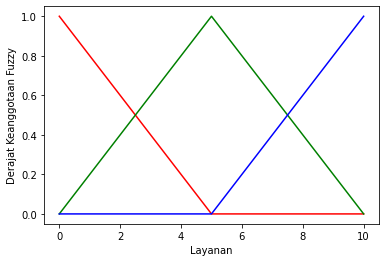

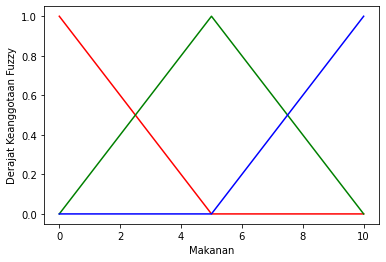

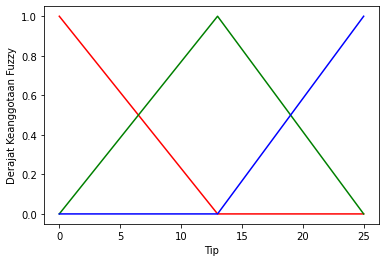

In [3]:
#visualisasi fungsi keanggotaan Layanan
fig,ax = plt.subplots()
ax.plot(Layanan,l_buruk, 'r' ,l_biasa, 'g' ,l_bagus, 'b')
ax.set_ylabel('Derajat Keanggotaan Fuzzy')
ax.set_xlabel('Layanan')
ax.set_ylim(-0.05,1.05)

#visualisasi fungsi keanggotaan Makanan
fig,ax = plt.subplots()
ax.plot(Makanan,m_tidak_enak, 'r' ,m_biasa, 'g' ,m_enak, 'b')
ax.set_ylabel('Derajat Keanggotaan Fuzzy')
ax.set_xlabel('Makanan')
ax.set_ylim(-0.05,1.05)

#visualisasi fungsi keanggotaan Tip
fig,ax = plt.subplots()
ax.plot(Tip,rendah, 'r' ,medium, 'g' ,tinggi, 'b')
ax.set_ylabel('Derajat Keanggotaan Fuzzy')
ax.set_xlabel('Tip')
ax.set_ylim(-0.05,1.05)

In [4]:
#fungsi untuk mengukur nilai Layanan
def Layanan_category(Layanan_in = 1):
    Layanan_cat_buruk = fuzz.interp_membership(Layanan, l_buruk, Layanan_in)
    Layanan_cat_biasa = fuzz.interp_membership(Layanan, l_biasa, Layanan_in)
    Layanan_cat_baik = fuzz.interp_membership(Layanan, l_bagus, Layanan_in)
    return dict(Buruk = Layanan_cat_buruk, Biasa=Layanan_cat_biasa, Baik=Layanan_cat_baik)

#fungsi untuk mengukur nilai Makanan
def Makanan_category(Makanan_in = 2):
    Makanan_cat_buruk = fuzz.interp_membership(Layanan, m_tidak_enak, Makanan_in)
    Makanan_cat_biasa = fuzz.interp_membership(Layanan, m_biasa, Makanan_in)
    Makanan_cat_baik = fuzz.interp_membership(Layanan, m_enak, Makanan_in)
    return dict(Tidak_Enak = Makanan_cat_buruk, Biasa=Makanan_cat_biasa, Enak=Makanan_cat_baik)

In [5]:
#input
#ditanyakan dalam soal jika Mang Udin memberikan nilai 9.8 untuk layanan dan 6.8 untuk kualitas makanan
Layanan_in=Layanan_category(9.8)
Makanan_in=Makanan_category(6.8)

print("Nilai Layanan", Layanan_in)
print("Niali Makanan", Makanan_in)

Nilai Layanan {'Buruk': 0.0, 'Biasa': 0.03999999999999987, 'Baik': 0.9600000000000002}
Niali Makanan {'Tidak_Enak': 0.0, 'Biasa': 0.64, 'Enak': 0.36}


In [6]:
#rule
rule1 = np.fmax((Layanan_in['Buruk']), (Makanan_in['Tidak_Enak']))
rule2 = np.fmax(Layanan_in['Biasa'], (Makanan_in['Biasa']))
rule3 = np.fmax((Layanan_in['Baik']), (Makanan_in['Enak']))

imp1 = np.fmin(rule1, rendah)
imp2 = np.fmin(rule2, medium)
imp3 = np.fmin(rule3, tinggi)

imp1.view()
imp2.view()
imp3.view()

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08333333,
       0.16666667, 0.25      , 0.33333333, 0.41666667, 0.5       ,
       0.58333333, 0.66666667, 0.75      , 0.83333333, 0.91666667,
       0.96      ])

In [7]:
#hitung agregat
aggregate_membership=np.fmax(imp1,np.fmin(imp2, imp3))

In [8]:
#hitung defuzzifikasi dengan centroid
#maka didapatkan result persen tip yang diberikan oleh Mang Udin
result_Tip = fuzz.defuzz(Tip, aggregate_membership, 'centroid')
print('Maka tip yang diberikan oleh Mang Udin adalah sebesar', result_Tip, '% dari total tagihan Mang Udin.')
tip_activation = fuzz.interp_membership(Tip, aggregate_membership, result_Tip)

Maka tip yang diberikan oleh Mang Udin adalah sebesar 19.0 % dari total tagihan Mang Udin.


Text(0.5, 0, 'Tip')

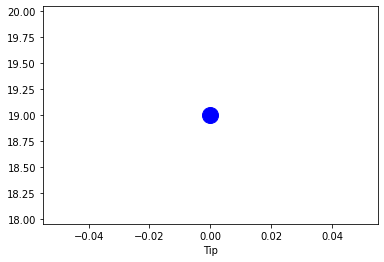

In [9]:
#visualisasi
plt.plot(result_Tip, 'bo', linewidth = 2, markersize = 16)
plt.xlabel("Tip")

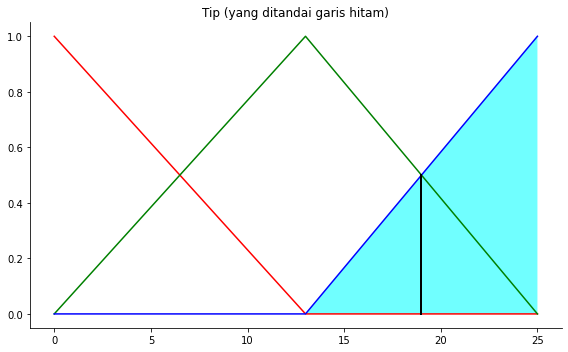

In [10]:
# Visualisasi
fig, ax0 = plt.subplots(figsize = (8,5))

ax0.plot(Tip, rendah, 'r')
ax0.plot(Tip, medium, 'g')
ax0.plot(Tip, tinggi, 'b')
ax0.fill_between(Tip, tinggi, facecolor='cyan', alpha = 0.56)
ax0.plot([result_Tip, result_Tip], [0, tip_activation], 'k', linewidth=2.0, alpha=1.0)
ax0.set_title('Tip (yang ditandai garis hitam)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [11]:
#dapat disimpulkan bahwa dengan Mang Udin memberikan penilaian pelayanan dengan nilai 9.8 dari 10,
#dan penilaian kualitas makanan dengan nilai 6.8 dari 10,
#mang Udin akan memberikan tip sebesar 19.0% dari total tagihan Mang Udin.
